This dataset aims to predict the probability of heart failure to an individual. 

# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings("ignore")

sns.set_palette("rainbow")
plt.style.use("dark_background")

In [2]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier

# IMPORT THE DATASET

In [3]:
df = pd.read_csv("/kaggle/input/heart-failure-prediction-clinical-records/heart_failure_clinical_records.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


There seems to be some outliers in the columns **creatine_phosphokinase and platelets.** I will explore this later in the visualizations part.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

There are no missing data in the dataset provided. This is better.

In [7]:
# check for outliers

#df.duplicated().sum()

The dataset has 3680 duplicates.

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
# df.duplicated()
df.shape

(1320, 13)

In [10]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# EDA AND DATA VISULIZATION

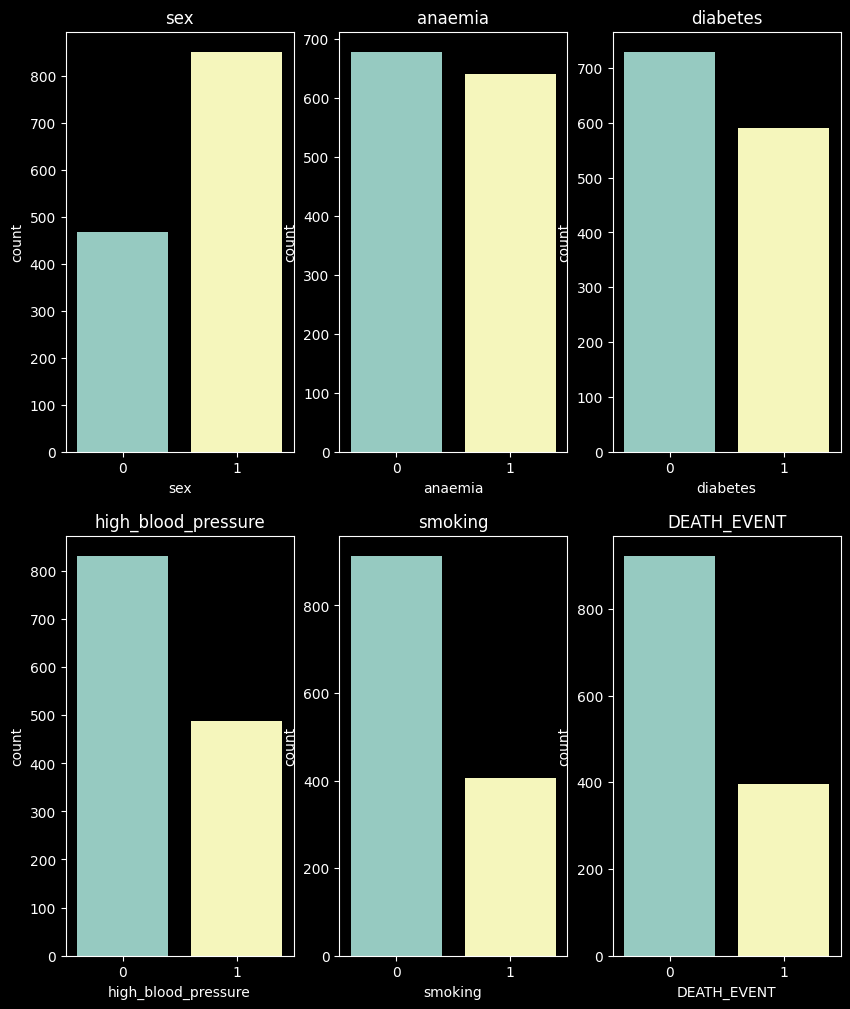

In [11]:
cat_cols = ['sex', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']
num_cols = [c for c in df.columns if c not in cat_cols]

# plot the cout plots of different categoricl columns using seaborn

fig, axes = plt.subplots(2, 3, figsize = (10,12))
axes = axes.flatten()

for i, column in enumerate(cat_cols):
    sns.countplot(df, x = column, ax= axes[i])
    axes[i].set_title(column)

    

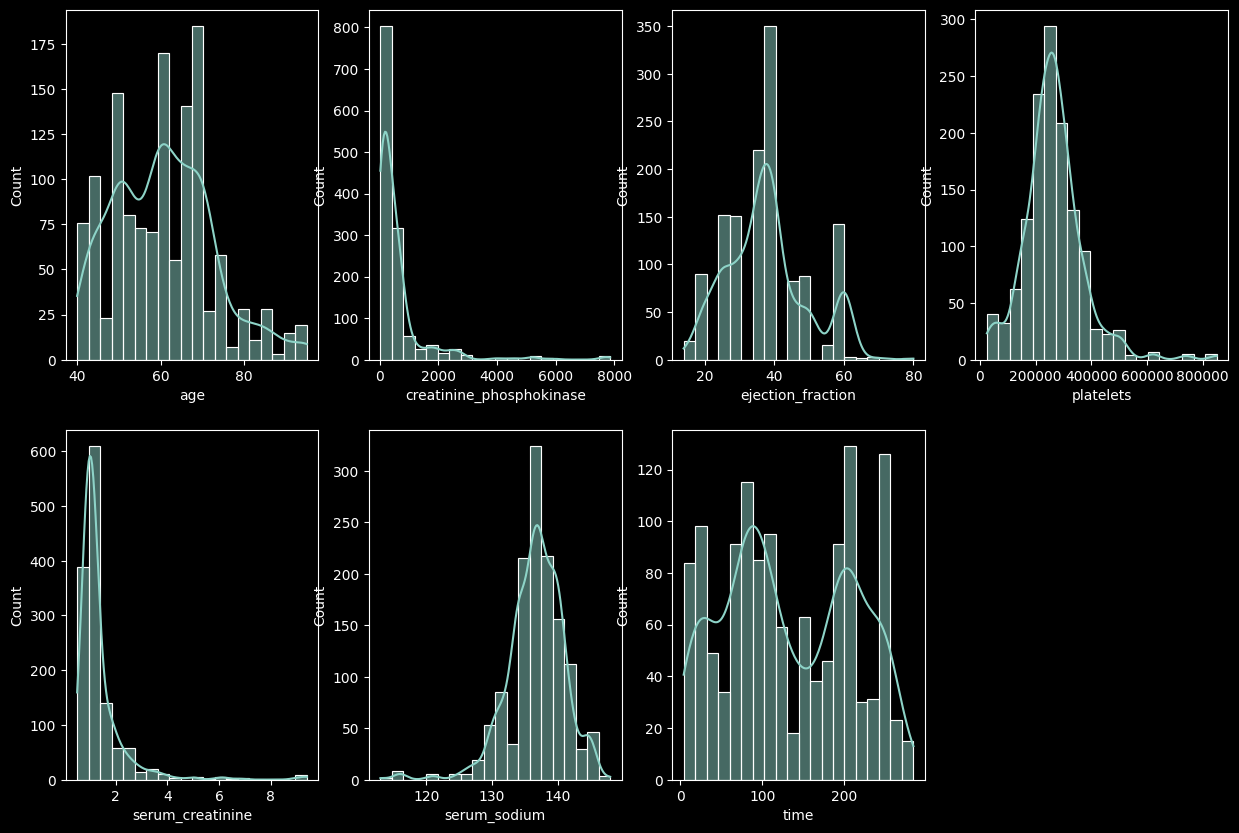

In [12]:
# box plots for the numerical columns

fig, axes = plt.subplots(2, 4, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(num_cols):
    sns.histplot(df,x =  column, bins=20, kde=True, ax = axes[i])

# rove any unused sbplits
for j in range(i + 1, len(axes)):
    plt.delaxes(axes[j])
    

Some columns such as creatinine_phosphokinase, platelets, serum_creatinine and serum_sodium seem to have outliers. Honest mistakes or genuine values?

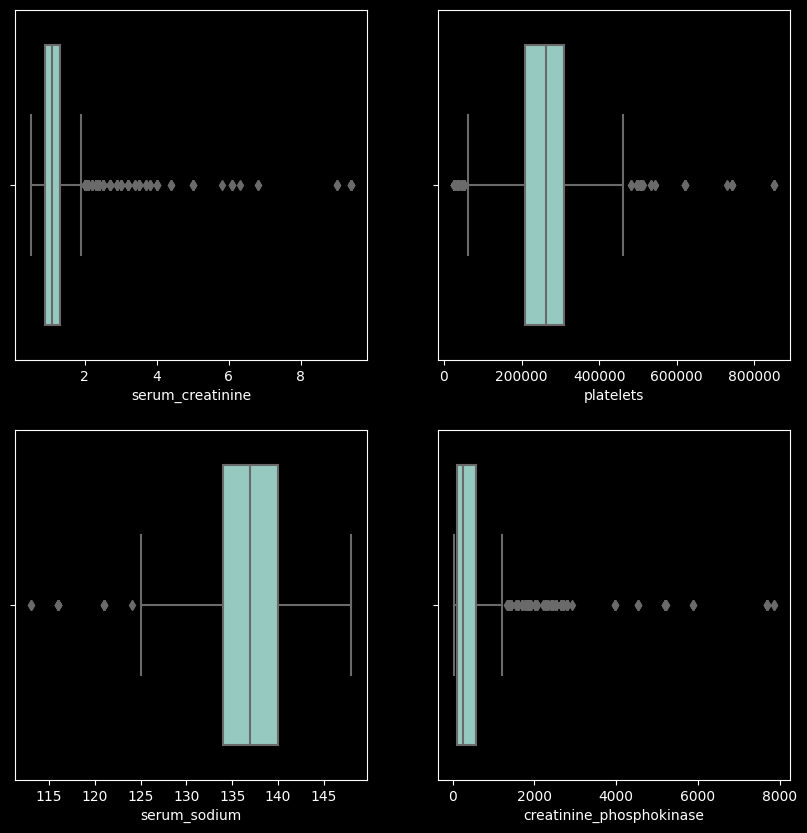

In [13]:
cols = ['serum_creatinine', 'platelets', 'serum_sodium', 'creatinine_phosphokinase']

fig, axes = plt.subplots(2, 2, figsize = (10, 10))

axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(df, x = col, ax = axes[i])

The columns above seem to be affected by the presence of outliers. 

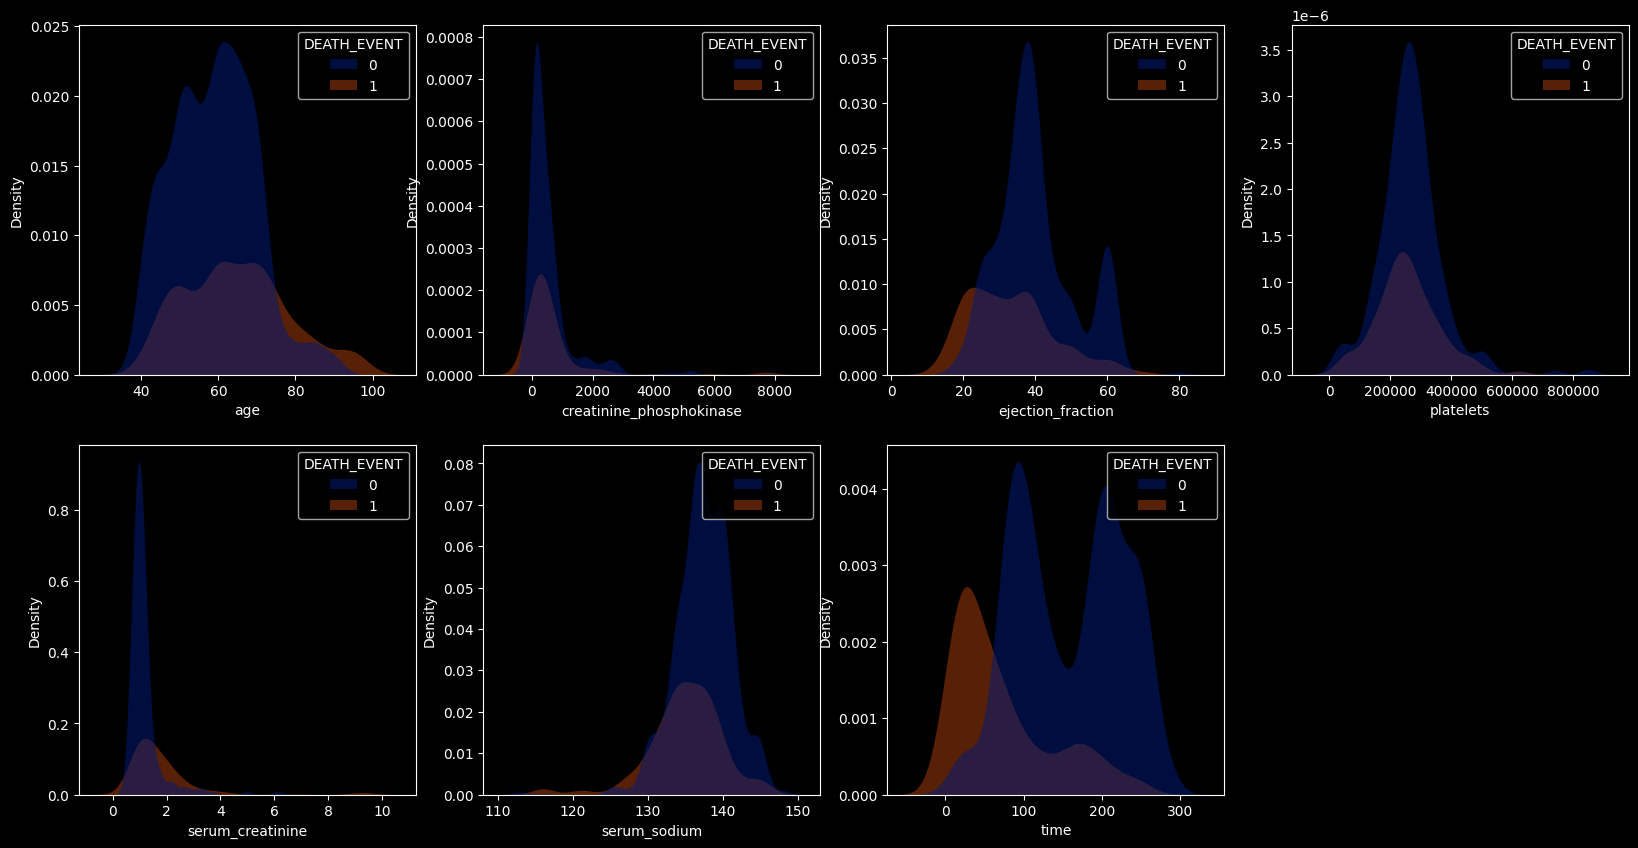

In [14]:
# comparing numerical columns with the target column.

fig, axes = plt.subplots(2, 4, figsize=(20,10))
axes = axes.flatten()

for i, column in enumerate(num_cols):
    sns.kdeplot(data=df, x=column, ax=axes[i], hue="DEATH_EVENT", palette="dark",  alpha=.5, linewidth=0, fill=True)

# remove all unused plots from the figure
for j in range(i+1, len(axes)):
    plt.delaxes(axes[j])

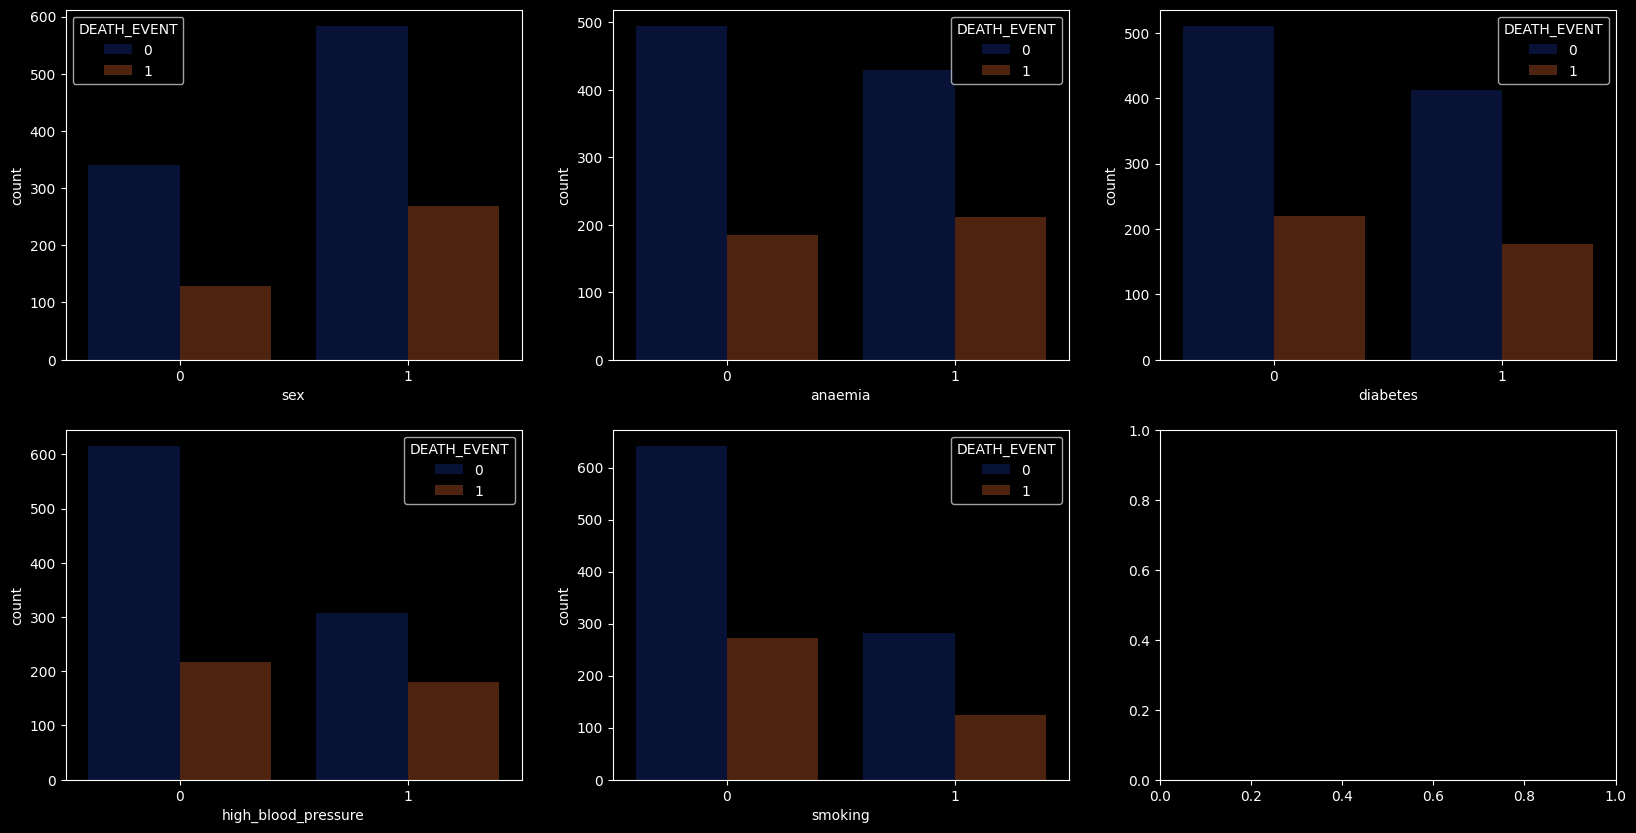

In [15]:
# comparing categorica columns with the target column.

fig, axes = plt.subplots(2, 3, figsize=(20,10))
axes = axes.flatten()

for i, column in enumerate(cat_cols):
    if column !="DEATH_EVENT":
        sns.countplot(data=df, x=column, ax=axes[i], hue="DEATH_EVENT", palette="dark",  alpha=.5, linewidth=0, fill=True)

# remove all unused plots from the figure
for j in range(i+1, len(axes)):
    plt.delaxes(axes[j])

<Axes: title={'center': 'Correalation matrix'}>

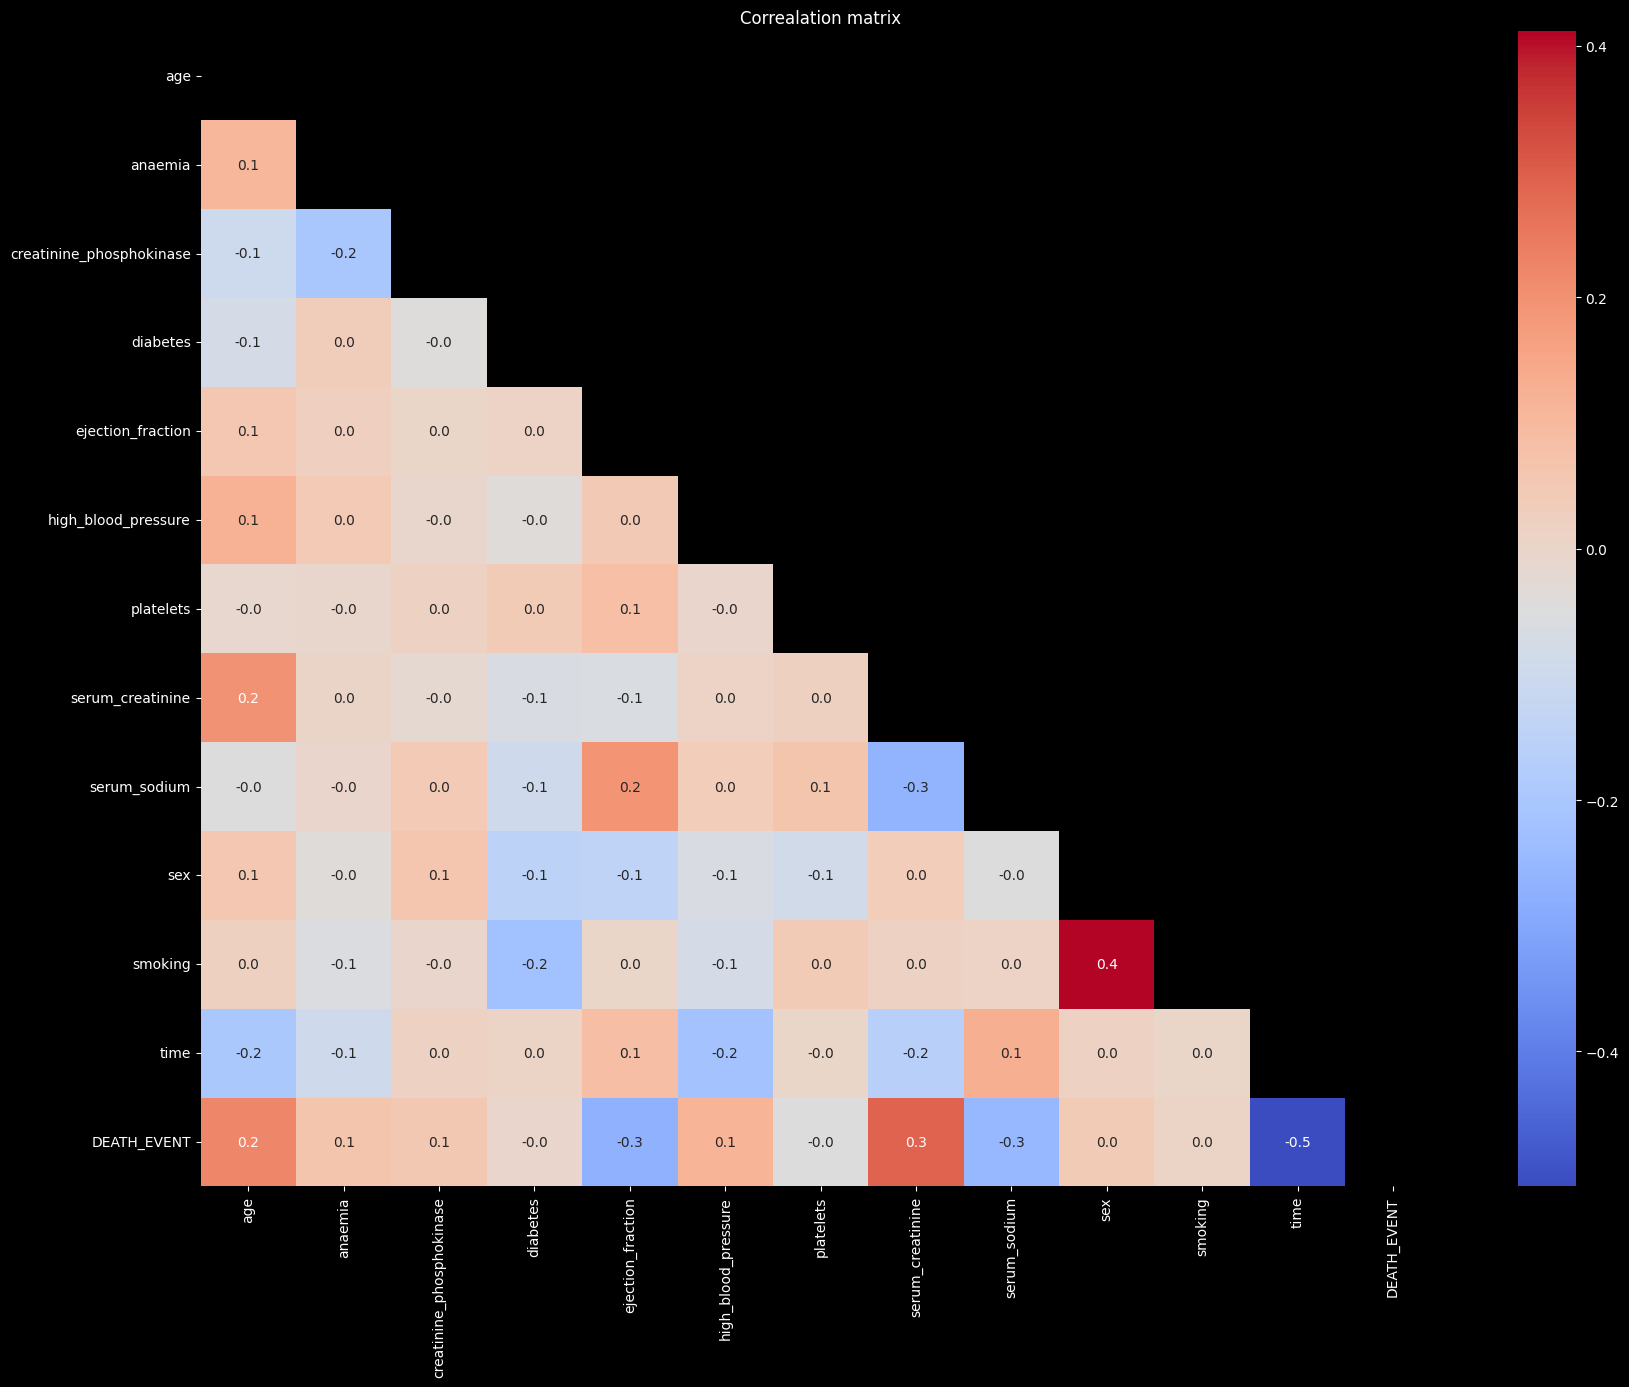

In [16]:
# correlation matrix

fig = plt.figure(figsize= (20, 15) )

gs = fig.add_gridspec(1, 1)
gs.update(wspace = 0.3, hspace= 0.15)
ax = fig.add_subplot(gs[0,0])

ax.set_title("Correalation matrix")
sns.heatmap(df.corr().transpose(), mask=np.triu(np.ones_like(df.corr().transpose())), fmt=".1f", annot=True, cmap="coolwarm")

# MODELLING

In [17]:
# split to train and test splits.

X = df.drop(['DEATH_EVENT'],  axis = 1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [18]:
voting_classifier = VotingClassifier(estimators=[(
    'cat', CatBoostClassifier(verbose=0)
), ('xg', XGBClassifier())
], voting="soft", verbose=False)

In [19]:
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('cat',
                              <catboost.core.CatBoostClassifier object at 0x7f3287ca36a0>),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [20]:
y_pred = voting_classifier.predict(X_test)

In [21]:
print('Accuracy', accuracy_score(y_pred, y_test))


Accuracy 0.9494949494949495


In [22]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       286
           1       0.91      0.91      0.91       110

    accuracy                           0.95       396
   macro avg       0.94      0.94      0.94       396
weighted avg       0.95      0.95      0.95       396



<Axes: >

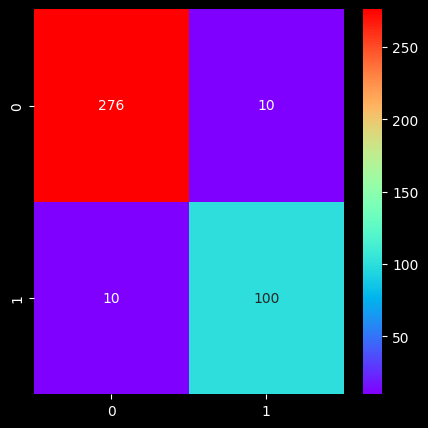

In [23]:
plt.subplots(figsize = (5, 5))

sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt='d', cmap='rainbow')